# 10. SciPy

In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


## 10.4 分析隨機數

In [2]:
from scipy import stats

In [3]:
generated = stats.norm.rvs(size = 900)

In [4]:
stats.norm.fit(generated)

(0.018258074154357158, 1.0248855794900413)

In [6]:
stats.skewtest(generated)

SkewtestResult(statistic=0.50213585005001282, pvalue=0.61557196385272328)

In [7]:
stats.kurtosistest(generated)

KurtosistestResult(statistic=0.85931338281082004, pvalue=0.39016764269512827)

In [8]:
stats.normaltest(generated)

NormaltestResult(statistic=0.99055990178322384, pvalue=0.60940028126188062)

In [9]:
stats.scoreatpercentile(generated, 95)

1.739774127148197

In [10]:
stats.percentileofscore(generated, 1)

84.0

(array([   6.,   27.,   90.,  183.,  235.,  211.,   96.,   43.,    7.,    2.]),
 array([-3.18051473, -2.48604859, -1.79158244, -1.0971163 , -0.40265016,
         0.29181598,  0.98628212,  1.68074826,  2.3752144 ,  3.06968054,
         3.76414668]),
 <a list of 10 Patch objects>)

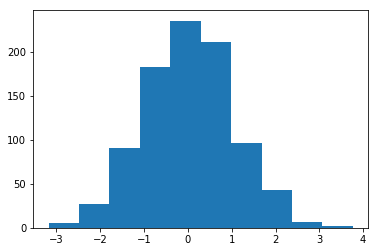

In [11]:
plt.hist(generated)

## 10.5 樣本比對

Means comparison Ttest_indResult(statistic=-0.25513647750655077, pvalue=0.79872260233004255)
Kolmogorov smirnov test Ks_2sampResult(statistic=0.039840637450199168, pvalue=0.98693692941846922)
Jarque Bera test 7.26152461221e-172


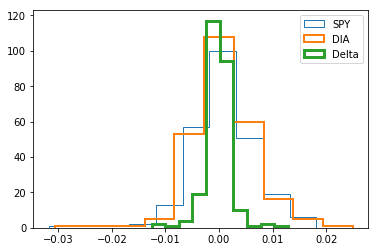

In [18]:
from matplotlib.finance import quotes_historical_yahoo_ochl
from datetime import date
import numpy as np
from scipy import stats
from statsmodels.stats.stattools import jarque_bera
import matplotlib.pyplot as plt


def get_close(symbol):
    today = date.today()
    start = (today.year - 1, today.month, today.day)
    
    quotes = quotes_historical_yahoo_ochl(symbol, start, today)
    quotes = np.array(quotes)
    
    return quotes.T[4]

spy =  np.diff(np.log(get_close("SPY")))
dia =  np.diff(np.log(get_close("DIA")))

print("Means comparison", stats.ttest_ind(spy, dia))
print("Kolmogorov smirnov test", stats.ks_2samp(spy, dia))

print("Jarque Bera test", jarque_bera(spy - dia)[1])

plt.hist(spy, histtype="step", lw=1, label="SPY")
plt.hist(dia, histtype="step", lw=2, label="DIA") 
plt.hist(spy - dia, histtype="step", lw=3, label="Delta")
plt.legend()
plt.show()

## 10.7 信號處理

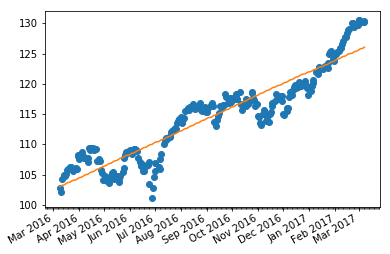

In [20]:
from matplotlib.finance import quotes_historical_yahoo_ochl
from datetime import date
import numpy as np
from scipy import signal
import matplotlib.pyplot as plt
from matplotlib.dates import DateFormatter
from matplotlib.dates import DayLocator
from matplotlib.dates import MonthLocator


today = date.today()
start = (today.year - 1, today.month, today.day)

quotes = quotes_historical_yahoo_ochl("QQQ", start, today)
quotes = np.array(quotes)

dates = quotes.T[0]
qqq = quotes.T[4]


y = signal.detrend(qqq)

alldays = DayLocator()              
months = MonthLocator()
month_formatter = DateFormatter("%b %Y")

fig = plt.figure()
ax = fig.add_subplot(111)

plt.plot(dates, qqq, 'o', dates, qqq - y, '-')
ax.xaxis.set_minor_locator(alldays)
ax.xaxis.set_major_locator(months)
ax.xaxis.set_major_formatter(month_formatter)
fig.autofmt_xdate()
plt.show()

## 10.9 Fourier 分析

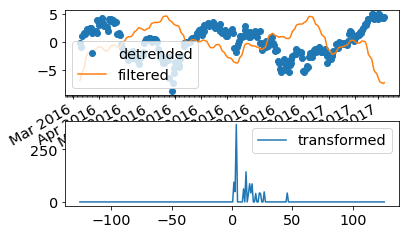

In [22]:
from matplotlib.finance import quotes_historical_yahoo_ochl
from datetime import date
import numpy as np
from scipy import signal
import matplotlib.pyplot as plt
from scipy import fftpack
from matplotlib.dates import DateFormatter
from matplotlib.dates import DayLocator
from matplotlib.dates import MonthLocator


today = date.today()
start = (today.year - 1, today.month, today.day)

quotes = quotes_historical_yahoo_ochl("QQQ", start, today)
quotes = np.array(quotes)

dates = quotes.T[0]
qqq = quotes.T[4]


y = signal.detrend(qqq)


alldays = DayLocator()              
months = MonthLocator()
month_formatter = DateFormatter("%b %Y")

fig = plt.figure()
fig.subplots_adjust(hspace=.3)
ax = fig.add_subplot(211)

ax.xaxis.set_minor_locator(alldays)
ax.xaxis.set_major_locator(months)
ax.xaxis.set_major_formatter(month_formatter)

# make font size bigger
ax.tick_params(axis='both', which='major', labelsize='x-large')

amps = np.abs(fftpack.fftshift(fftpack.rfft(y)))
amps[amps < 0.1 * amps.max()] = 0

plt.plot(dates, y, 'o', label="detrended")
plt.plot(dates, -fftpack.irfft(fftpack.ifftshift(amps)), label="filtered")
fig.autofmt_xdate()
plt.legend(prop={'size':'x-large'})

ax2 = fig.add_subplot(212)
ax2.tick_params(axis='both', which='major', labelsize='x-large')
N = len(qqq)
plt.plot(np.linspace(-N/2, N/2, N), amps, label="transformed")

plt.legend(prop={'size':'x-large'})
plt.show()

## 10.11 數學優化

## 10.12 擬合 正弦波

P0 [2.4972443587633855, 0.0019841269841269823, 0, 0]
P [ -2.50550603e+00   2.73033087e-03  -3.44161391e+03  -4.69077134e-03]


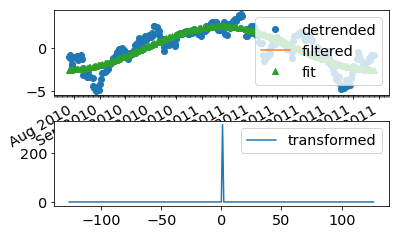

In [27]:
from matplotlib.finance import quotes_historical_yahoo_ochl
import numpy as np
import matplotlib.pyplot as plt
from scipy import fftpack
from scipy import signal
from matplotlib.dates import DateFormatter
from matplotlib.dates import DayLocator
from matplotlib.dates import MonthLocator
from scipy import optimize


start = (2010, 7, 25)
end = (2011, 7, 25)

quotes = quotes_historical_yahoo_ochl("QQQ", start, end)
quotes = np.array(quotes)

dates = quotes.T[0]
qqq = quotes.T[4]


y = signal.detrend(qqq)


alldays = DayLocator()              
months = MonthLocator()
month_formatter = DateFormatter("%b %Y")

fig = plt.figure()
fig.subplots_adjust(hspace=.3)
ax = fig.add_subplot(211)

ax.xaxis.set_minor_locator(alldays)
ax.xaxis.set_major_locator(months)
ax.xaxis.set_major_formatter(month_formatter)
ax.tick_params(axis='both', which='major', labelsize='x-large')

amps = np.abs(fftpack.fftshift(fftpack.rfft(y)))
amps[amps < amps.max()] = 0

def residuals(p, y, x):
    A,k,theta,b = p
    err = y-A * np.sin(2* np.pi* k * x + theta) + b
    return err

filtered = -fftpack.irfft(fftpack.ifftshift(amps))
N = len(qqq)
f = np.linspace(-N/2, N/2, N)
p0 = [filtered.max(), f[amps.argmax()]/(2*N), 0, 0]
print("P0", p0)

plsq = optimize.leastsq(residuals, p0, args=(filtered, dates))
p = plsq[0]
print("P", p)
plt.plot(dates, y, 'o', label="detrended")
plt.plot(dates, filtered, label="filtered")
plt.plot(dates, p[0] * np.sin(2 * np.pi * dates * p[1] + p[2]) + p[3], '^', label="fit")
fig.autofmt_xdate()
plt.legend(prop={'size':'x-large'})

ax2 = fig.add_subplot(212)
ax2.tick_params(axis='both', which='major', labelsize='x-large')
plt.plot(f, amps, label="transformed")

plt.legend(prop={'size':'x-large'})
plt.show()

## 10.13 數值積分

## 10.14 高斯積分 (Gaussian integral)

In [29]:
from scipy import integrate
import numpy as np

print("Gaussian integral", np.sqrt(np.pi), integrate.quad(lambda x: np.exp(-x**2), -np.inf, np.inf))

Gaussian integral 1.77245385091 (1.7724538509055159, 1.4202636780944923e-08)


## 10.15 插值

## 10.16 一維插值

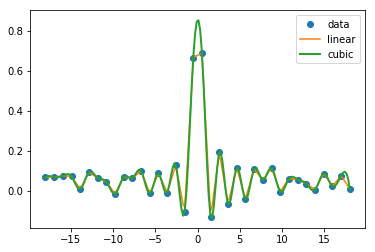

In [30]:
import numpy as np
from scipy import interpolate
import matplotlib.pyplot as plt

x = np.linspace(-18, 18, 36)
noise = 0.1 * np.random.random(len(x))
signal = np.sinc(x) + noise

x2 = np.linspace(-18, 18, 180)

interpreted = interpolate.interp1d(x, signal)
y = interpreted(x2)

cubic = interpolate.interp1d(x, signal, kind="cubic")
y2 = cubic(x2)

plt.plot(x, signal, 'o', label="data")
plt.plot(x2, y, '-', label="linear")
plt.plot(x2, y2, '-', lw=2, label="cubic")

plt.legend()
plt.show()

## 10.17 圖像處理

## 10.18 處理 Lena 圖像

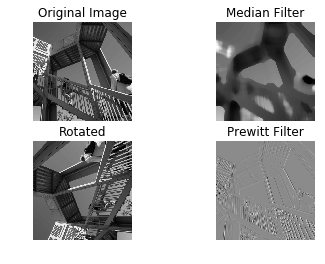

In [33]:
from scipy import misc
import numpy as np
import matplotlib.pyplot as plt
from scipy import ndimage


image = misc.ascent().astype(np.float32)

plt.subplot(221)
plt.title("Original Image") 
img = plt.imshow(image, cmap=plt.cm.gray) 
plt.axis("off")

plt.subplot(222) 
plt.title("Median Filter") 
filtered = ndimage.median_filter(image, size=(42,42))
plt.imshow(filtered, cmap=plt.cm.gray) 
plt.axis("off")

plt.subplot(223) 
plt.title("Rotated") 
rotated = ndimage.rotate(image, 90)
plt.imshow(rotated, cmap=plt.cm.gray) 
plt.axis("off")

plt.subplot(224) 
plt.title("Prewitt Filter") 
filtered = ndimage.prewitt(image)
plt.imshow(filtered, cmap=plt.cm.gray) 
plt.axis("off")
plt.show()

## 10.19 音頻處理

## 10.20 重複音頻片段

Content-Type: audio/wav
Last-Modified: Tue, 12 Aug 2014 15:53:38 GMT
Accept-Ranges: bytes
ETag: "ac20ba9445b6cf1:0"
Server: Microsoft-IIS/7.5
X-Powered-By: ASP.NET
Date: Thu, 09 Mar 2017 10:01:08 GMT
Connection: close
Content-Length: 43642


Data type uint8 Shape (43584,)


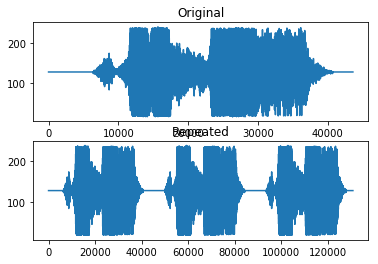

In [53]:
from scipy.io import wavfile
import matplotlib.pyplot as plt
import urllib
import numpy as np
import sys

# urllib.request.urlopen
response = urllib.request.urlopen('http://www.thesoundarchive.com/austinpowers/smashingbaby.wav')
print(response.info())
WAV_FILE = 'smashingbaby.wav'
filehandle = open(WAV_FILE, 'wb')
filehandle.write(response.read())
filehandle.close()
sample_rate, data = wavfile.read(WAV_FILE)
print("Data type", data.dtype, "Shape", data.shape)

plt.subplot(2, 1, 1)
plt.title("Original")
plt.plot(data)

plt.subplot(2, 1, 2)

# Repeat the audio fragment
N = 3
repeated = np.tile(data, N)

# Plot the audio data
plt.title("Repeated")
plt.plot(repeated)
wavfile.write("repeated_yababy.wav",
    sample_rate, repeated)

plt.show()